In [32]:
import pandas as pd
from acquire import get_titanic_data
from prepare import prep_titanic_data

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

df = prep_titanic_data(get_titanic_data())

In [2]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,embarked_encode
0,0,0,3,male,22.0,1,0,7.2500,S,Third,Southampton,0,3
1,1,1,1,female,38.0,1,0,71.2833,C,First,Cherbourg,0,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,Southampton,1,3
3,3,1,1,female,35.0,1,0,53.1000,S,First,Southampton,0,3
4,4,0,3,male,35.0,0,0,8.0500,S,Third,Southampton,1,3


In [3]:
df.dropna(inplace=True)

In [4]:
train, test = train_test_split(df)

In [6]:
# 1. Make the thing
scaler = MinMaxScaler()

# 2. Fit the thing
scaler.fit(train[['age', 'fare']])

# 3. Use the thing
train[['age', 'fare']] = scaler.transform(train[['age', 'fare']])
test[['age', 'fare']] = scaler.transform(test[['age', 'fare']])

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

In [7]:
train.head(10)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,embarked_encode
604,604,1,1,male,0.469965,0,0,0.051822,C,First,Cherbourg,1,0
434,434,0,1,male,0.673824,1,0,0.109110,S,First,Southampton,0,3
137,137,0,1,male,0.497146,1,0,0.103644,S,First,Southampton,0,3
86,86,0,3,male,0.211742,1,3,0.067096,S,Third,Southampton,0,3
885,885,0,3,female,0.524327,0,5,0.056848,Q,Third,Queenstown,0,2
588,588,0,3,male,0.293286,0,0,0.015713,S,Third,Southampton,1,3
890,890,0,3,male,0.429193,0,0,0.015127,Q,Third,Queenstown,1,2
150,150,0,2,male,0.687415,0,0,0.024447,S,Second,Southampton,1,3
865,865,1,2,female,0.565099,0,0,0.025374,S,Second,Southampton,1,3
443,443,1,2,female,0.374830,0,0,0.025374,S,Second,Southampton,1,3


In [9]:
logit = LogisticRegression()

In [10]:
logit.fit(train[['pclass', 'age', 'fare', 'sibsp', 'parch']], train.survived)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [11]:
logit.predict(train[['pclass', 'age', 'fare', 'sibsp', 'parch']])

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [14]:
logit.predict_proba(train[['pclass','age','fare','sibsp','parch']])

array([[0.36281381, 0.63718619],
       [0.51774591, 0.48225409],
       [0.42056015, 0.57943985],
       ...,
       [0.77725446, 0.22274554],
       [0.76676672, 0.23323328],
       [0.72634553, 0.27365447]])

In [15]:
train['prediction'] = logit.predict(train[['pclass','age','fare','sibsp','parch']])

In [18]:
(train.survived == train.prediction).sum() / train.shape[0]

0.708411214953271

In [24]:
confusion_matrix(train.survived, train.prediction)

array([[277,  45],
       [111, 102]])

In [30]:
df = pd.DataFrame(confusion_matrix(train.survived, train.prediction),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])

df

,Pred -,Pred +
Actual -,277,45
Actual +,111,102


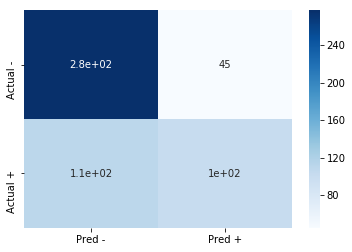

In [31]:
%matplotlib inline
import seaborn as sns

sns.heatmap(df, cmap='Blues', annot=True)

In [33]:
print(classification_report(train.survived, train.prediction))

              precision    recall  f1-score   support

           0       0.71      0.86      0.78       322
           1       0.69      0.48      0.57       213

   micro avg       0.71      0.71      0.71       535
   macro avg       0.70      0.67      0.67       535
weighted avg       0.71      0.71      0.70       535



In [34]:
train.survived.value_counts()

0    322
1    213
Name: survived, dtype: int64

In [35]:
train.prediction.value_counts()

0    388
1    147
Name: prediction, dtype: int64